In [1]:
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

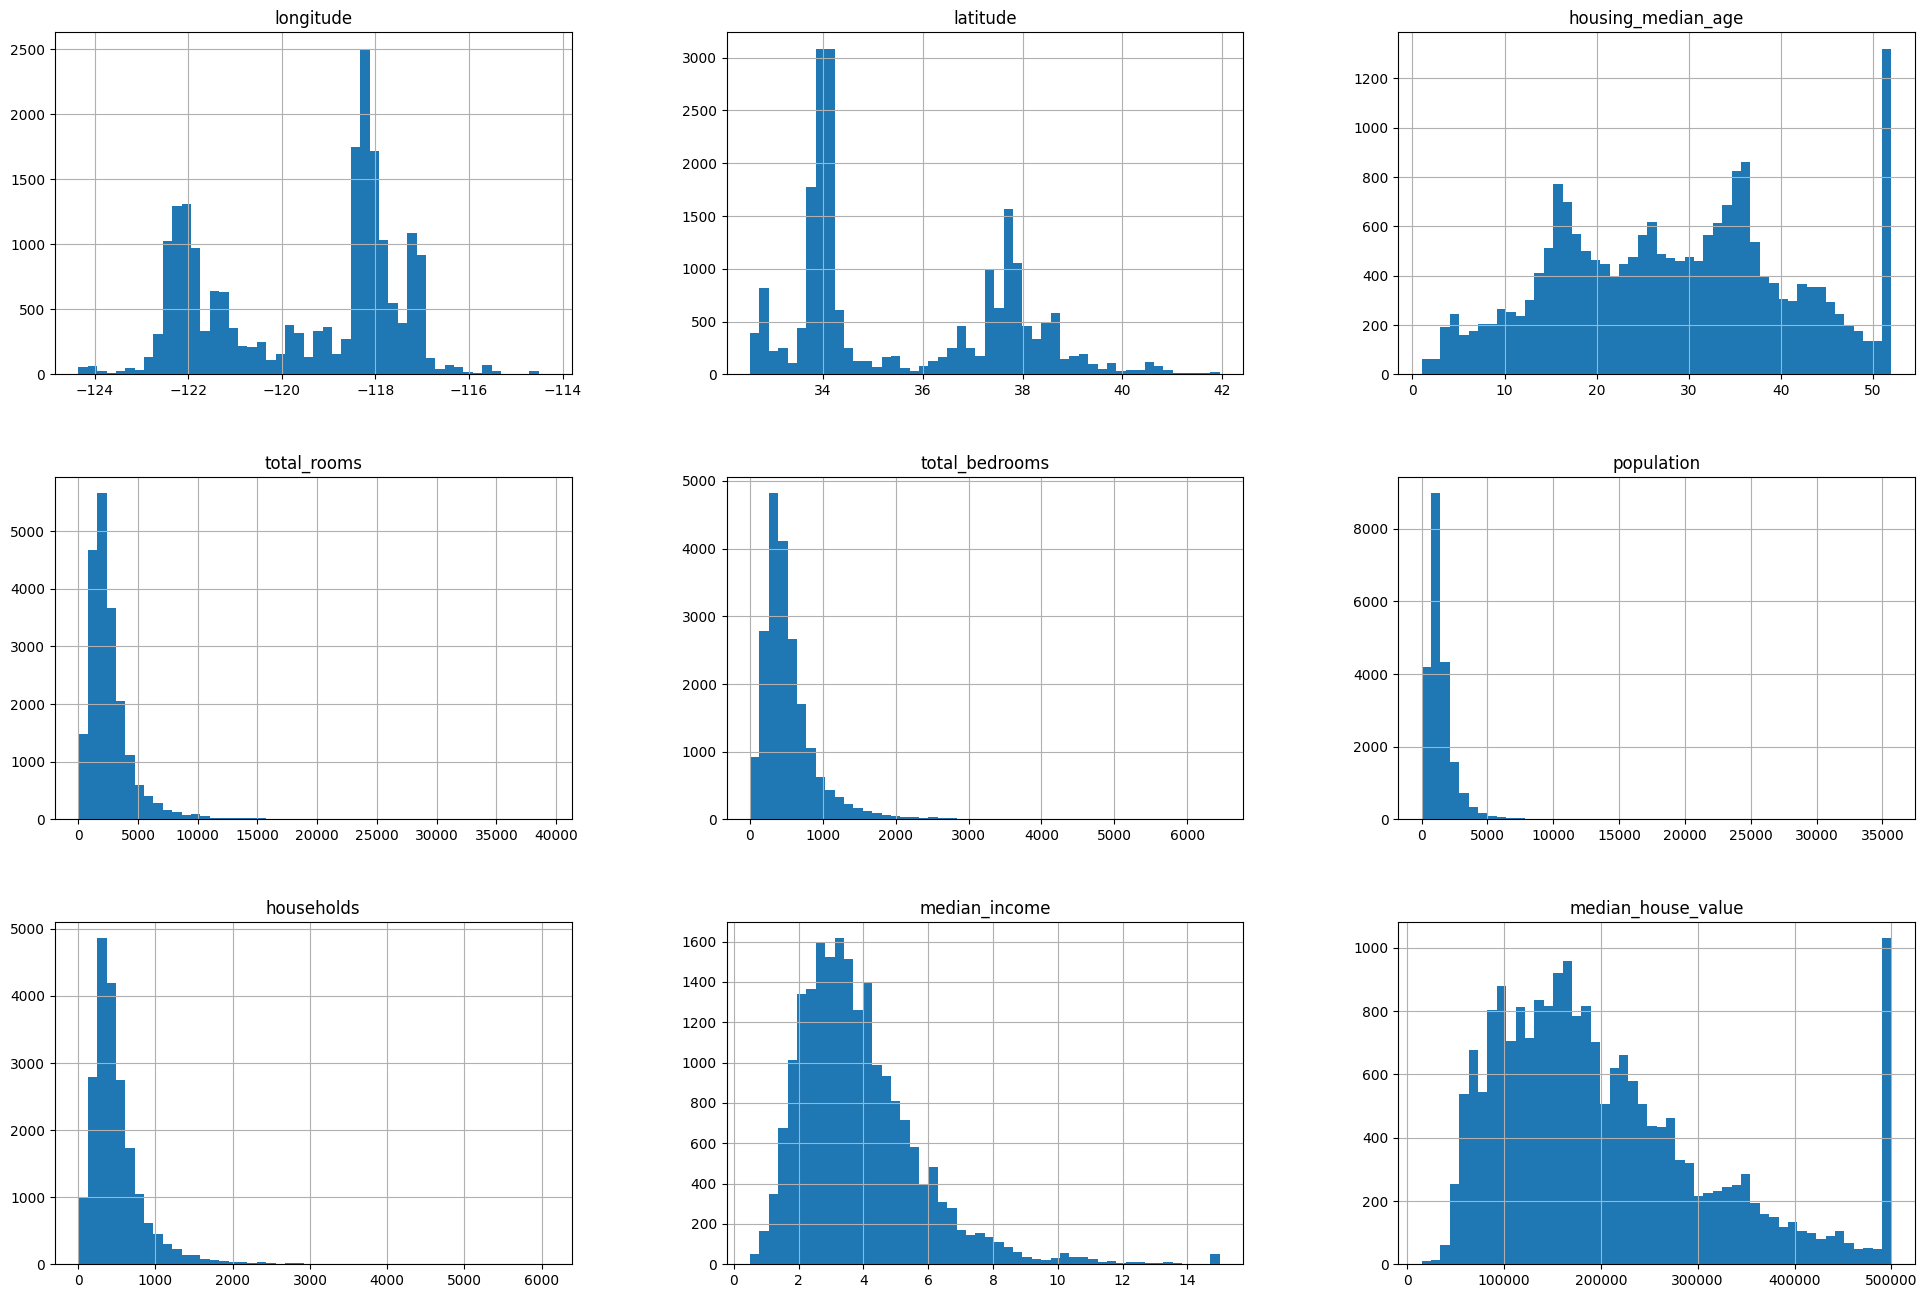

In [7]:
housing.hist(bins=50,figsize=(24,16))

In [8]:
def get_train_test_data_random_sampling(df,test_ratio): # by random suffling
    np.random.seed(42)
    random_indices = np.random.permutation(len(df))
    test_index_size = int(len(df)*test_ratio)
    test_indices = random_indices[:test_index_size]
    train_indices = random_indices[test_index_size:]
    return df.iloc[train_indices],df.iloc[test_indices]
    
train_data,test_data = get_train_test_data_random_sampling(housing,0.2)

In [9]:
# categorizing income_category in 5 labels
housing["income_cat"] = pd.cut(housing["median_income"],
                             bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                             labels=[1, 2, 3, 4, 5])

<Axes: xlabel='income_cat'>

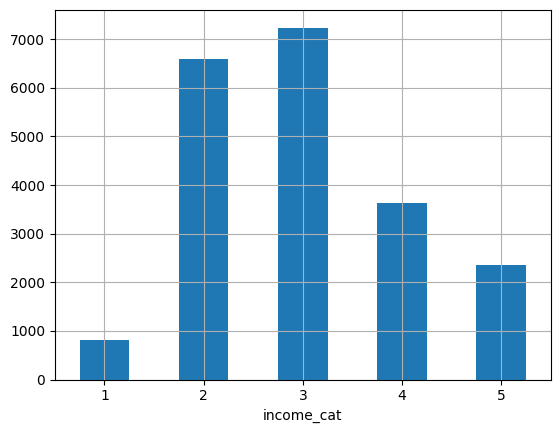

In [10]:
# plotting frequency of value vs the value bar graph (it seems like normal distribution btw)
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True) # sort index shorts the labels

In [11]:
# stratified shuffle split 

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
split.split(housing,housing['income_cat'])
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


<Axes: xlabel='income_cat'>

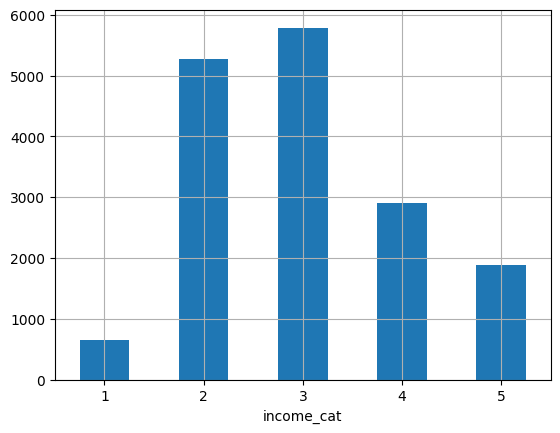

In [12]:
strat_train_set['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True) #perfectly distributed data

In [13]:
# we have used the "income_cat" column only to split the data using stratified sampling now we don't need it in train_set and test_set
strat_train_set.drop("income_cat",axis=1,inplace=True)


In [14]:
strat_test_set.drop("income_cat",axis=1,inplace=True) # axis 1 is needed to tell pandas that we want to delete a column


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


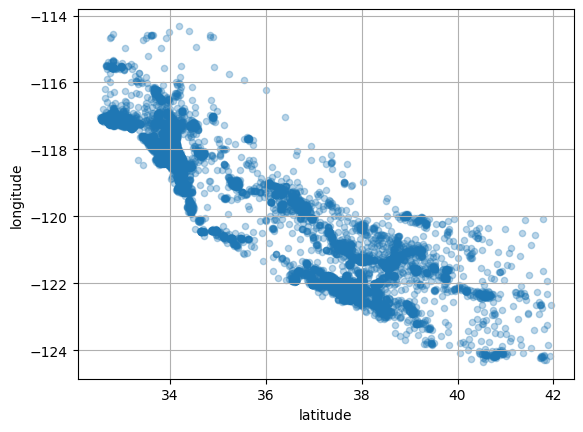

In [ ]:
df = strat_train_set.copy()
df.plot(kind="scatter",x="latitude",y="longitude",grid=True,alpha=0.3) #telling which region has more houses which has less

<Axes: xlabel='latitude', ylabel='longitude'>

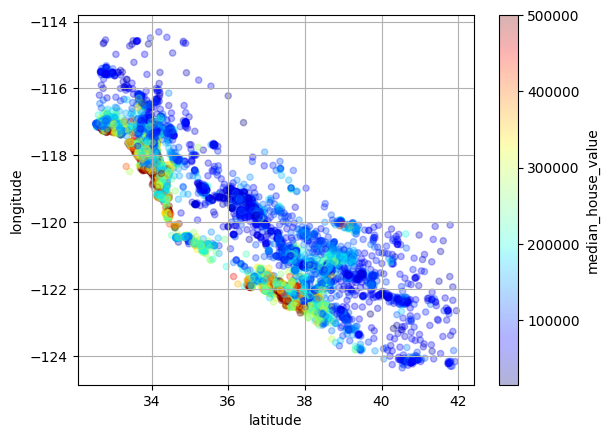

In [16]:
df.plot(kind="scatter",x="latitude",y="longitude",grid=True,alpha=0.3,cmap="jet",c="median_house_value") #plot with colors
# it is telling which regin has most houses and which has less and also which reason has more expensive houses or cheap houses

In [17]:
df.drop('ocean_proximity',axis=1).corr()  # as correlation doesn't take categorical data so after removing we can see that house price is closely related to median_income as compared to other features


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


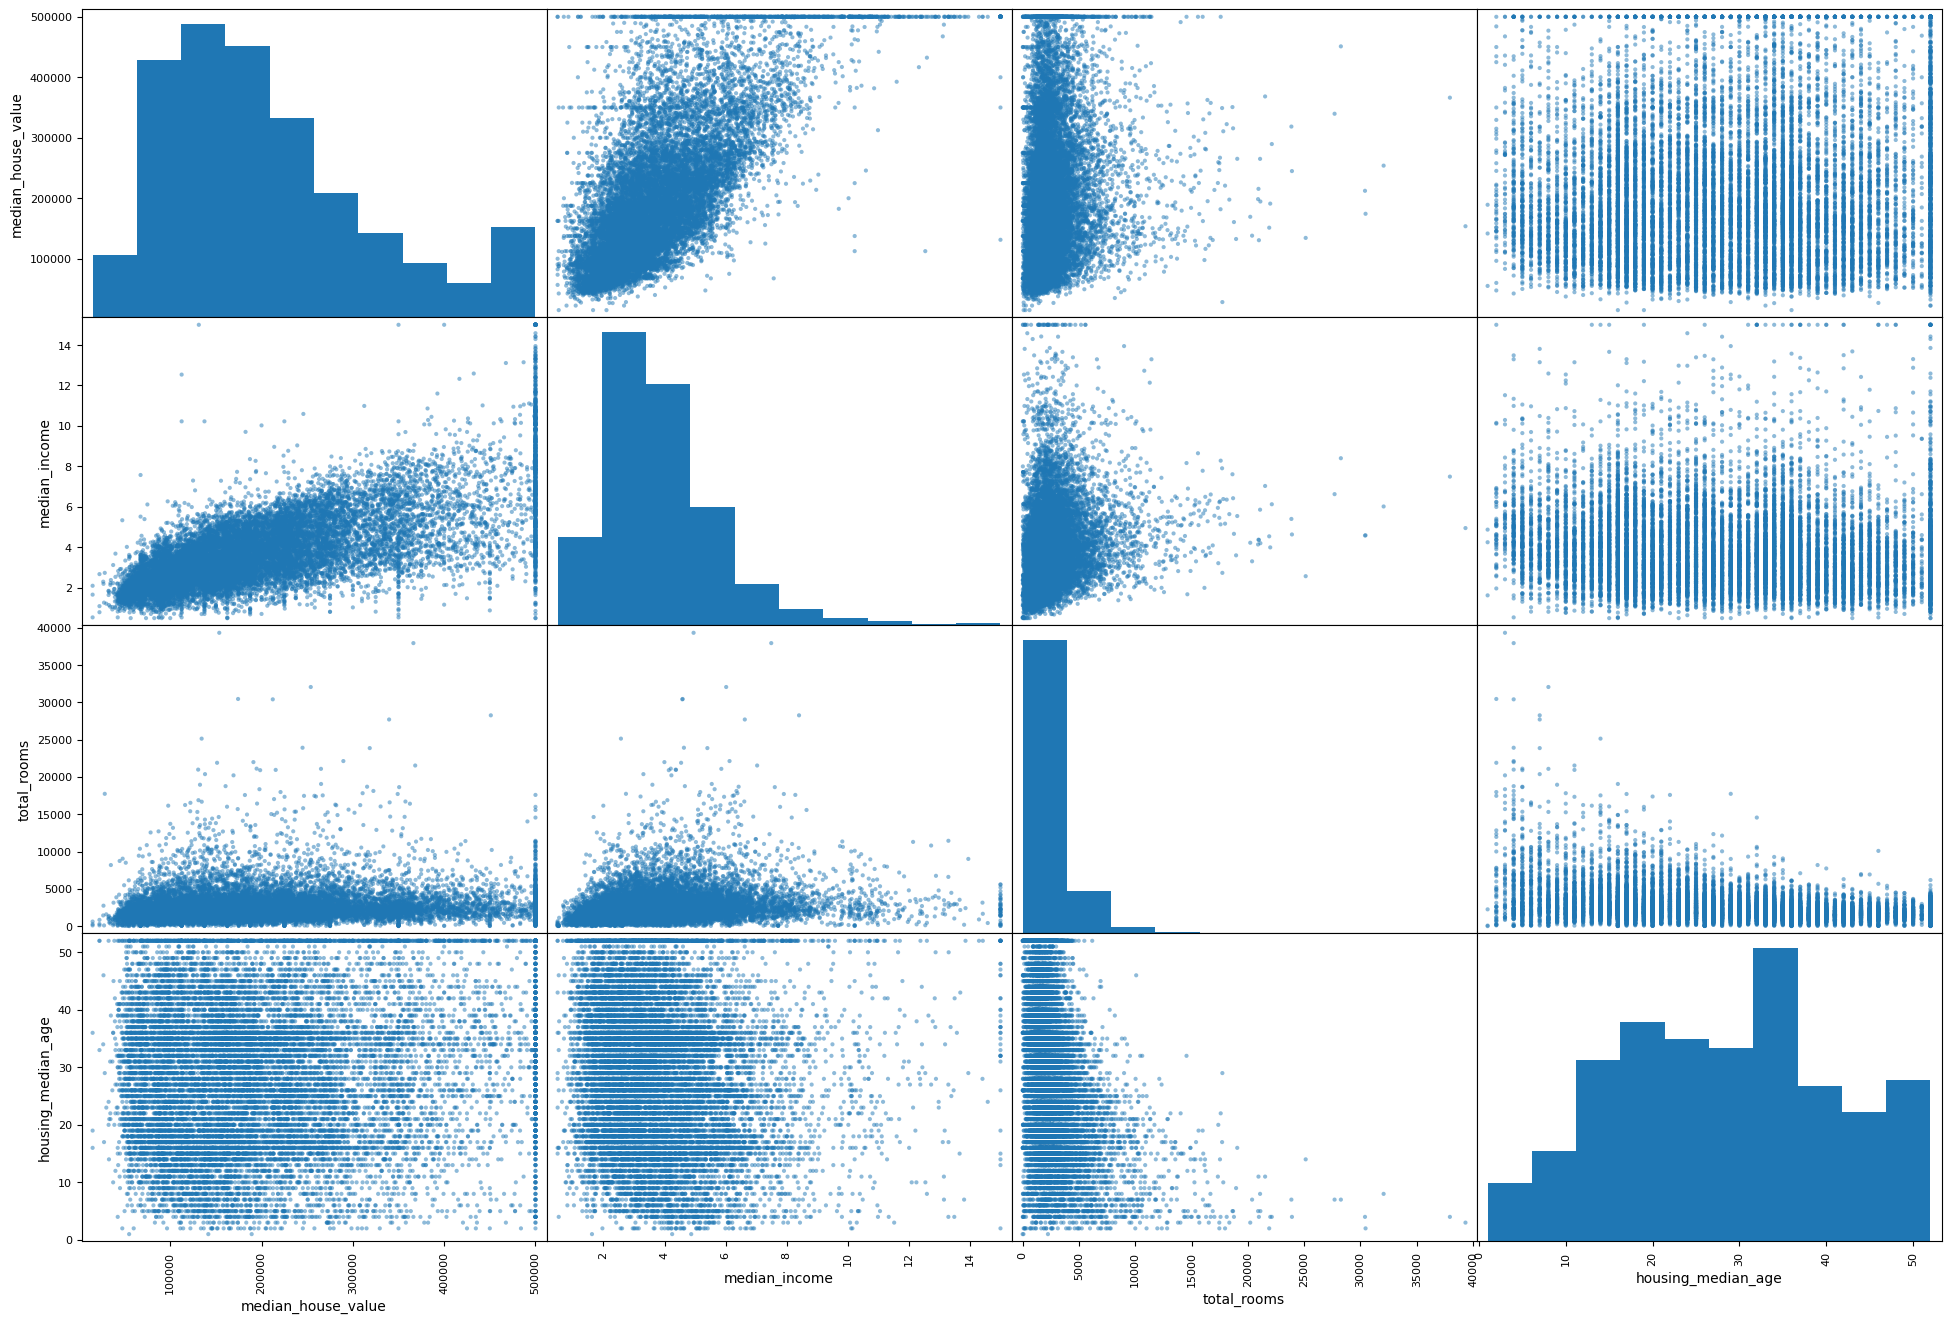

In [18]:
from pandas.plotting import scatter_matrix
 
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] # as we can see median_house_value and medium income are correlated somehow other are just crap
scatter_matrix(df[attributes], figsize=(24, 16))
plt.show()

In [58]:
housing_train = strat_train_set.copy()
housing_train_features_num = housing_train.select_dtypes(include=[np.number])
housing_train_features_num.drop("median_house_value",axis=1,inplace=True)
housing_train_features_alpha = housing_train[['ocean_proximity']]
housing_train_labels = housing_train['median_house_value']

housing_train_features_num.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
# Now it can have some missing values in any column to approximate that we use imputer 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(housing_train_features_num) # calculated the values to impute 

housing_train_features_num_imputed = imputer.transform(housing_train_features_num)
housing_train_features_num_imputed = pd.DataFrame(housing_train_features_num_imputed,columns=housing_train_features_num.columns,index=housing_train_features_num.index)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [63]:
# now to handle categorical data ( to convert it in numbers as model processes on numerical data)

# ordinal encoding (assigning one number to one value), can be used when numbers also telling some kind of sense like star rating ow don't use
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_train_features_alpha_encoded = ordinal_encoder.fit_transform(housing_train_features_alpha)
housing_train_features_alpha_ordencoded = pd.DataFrame(housing_train_features_alpha_encoded,columns=housing_train_features_alpha.columns,index=housing_train_features_alpha.index)
housing_train_features = housing_train_features_num_imputed
housing_train_features['ocean_proximity'] = housing_train_features_alpha_ordencoded['ocean_proximity']
housing_train_features_imputed_ordencoded = housing_train_features


In [75]:
# we mostly use one hot encoding which makes column of values of categories and assign 1 if it is in that row other are 0
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_train_features_alpha_onehotencoded = one_hot_encoder.fit_transform(housing_train_features_alpha)
print(one_hot_encoder.categories_)
housing_train_features_alpha_onehotencoded = pd.DataFrame(housing_train_features_alpha_onehotencoded.toarray(),columns=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],index=housing_train_features_alpha.index)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [88]:
housing_train_features_imputed_onehotencoded = pd.concat([housing_train_features_num_imputed,housing_train_features_alpha_onehotencoded],axis=1)
housing_train_features_imputed_onehotencoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.0,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,1.0,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.0,0.0,0.0,0.0,0.0


In [ ]:
# but right now our numerical features are not scaled enough as it is ranging from very low to very high in a single column so it affects the machine learning model as it can give dominance to larger values
# so it is necessary to scale down the features
# it has two ways, min max scaling(normalization)(x-min/max-min)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_train_features_imputed_onehotencoded_normallyscaled = min_max_scaler.fit_transform(housing_train_features_imputed_onehotencoded)
housing_train_features_imputed_onehotencoded_normallyscaled = pd.DataFrame(housing_train_features_imputed_onehotencoded_normallyscaled,columns=housing_train_features_imputed_onehotencoded.columns,index=housing_train_features_imputed_onehotencoded.index)
housing_train_features_imputed_onehotencoded_normallyscaled
# but it has a problem with outliers(mistook high values) it can distort the data frame badly

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-0.424303,0.270988,0.098039,-0.803276,-0.743879,-0.874772,-0.737117,-0.769148,-1.0,1.0,-1.0,-1.0,-1.0
15502,0.418327,-0.883103,-0.764706,-0.729664,-0.725193,-0.887217,-0.713966,-0.194852,-1.0,-1.0,-1.0,-1.0,1.0
2908,0.057769,-0.398512,0.686275,-0.917994,-0.900773,-0.962779,-0.888723,-0.672405,-1.0,1.0,-1.0,-1.0,-1.0
14053,0.438247,-0.955367,-0.098039,-0.904818,-0.833441,-0.949830,-0.820388,-0.761865,-1.0,-1.0,-1.0,-1.0,1.0
20496,0.125498,-0.630181,0.019608,-0.820420,-0.792526,-0.897194,-0.784167,-0.448766,1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,0.450199,-0.895855,-0.490196,-0.661240,-0.604059,-0.886600,-0.626960,-0.366891,1.0,-1.0,-1.0,-1.0,-1.0
12661,-0.416335,0.268863,-0.450980,-0.598362,-0.542526,-0.732840,-0.471247,-0.680832,-1.0,1.0,-1.0,-1.0,-1.0
19263,-0.675299,0.253985,0.843137,-0.964338,-0.947165,-0.974495,-0.936520,-0.630378,1.0,-1.0,-1.0,-1.0,-1.0
19140,-0.671315,0.226355,-0.490196,-0.839803,-0.813789,-0.932453,-0.813667,-0.490145,1.0,-1.0,-1.0,-1.0,-1.0


In [91]:
#we use standard scaler (z-scaler) instead of normally scaling(x-mean/std dev)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_train_features_imputed_onehotencoded_standardscaled = std_scaler.fit_transform(housing_train_features_imputed_onehotencoded)
housing_train_features_imputed_onehotencoded_standardscaled = pd.DataFrame(housing_train_features_imputed_onehotencoded_standardscaled,columns=housing_train_features_imputed_onehotencoded.columns,index=housing_train_features_imputed_onehotencoded.index)
housing_train_features_imputed_onehotencoded_standardscaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.126529,-0.68391,-0.011006,-0.354889,-0.384217


In [95]:
#Pipelines: to manage multiple transforms in one place
# for eg. if we just want to impute and scale the numerical features
from sklearn.pipeline import Pipeline
mypipeline = Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standarize",StandardScaler())
])
housing_num_features_after_pipeline = mypipeline.fit_transform(housing_train_features_num)
housing_num_features_after_pipeline = pd.DataFrame(housing_num_features_after_pipeline,columns=housing_train_features_num.columns,index=housing_train_features_num.index)
housing_num_features_after_pipeline

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


In [ ]:
# since categorical features are not allowed in above pipe line so we have to make different pipeline for these attributes
# by using column transformer we can tell the pipeline on which columns do i have to run this transform
# now here we conclude this notebook we have to make a model that will be in main.py in this folder